In [145]:
# import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Analyse data from Rotten Tomatoes for a comparison with TN dataset

In [146]:
#import the rt datasets
movies_info = pd.read_table('rt.movie_info.tsv')
movies_budget = pd.read_csv('tn.movie_budgets.csv')
rt_reviews = pd.read_table('rt.reviews.tsv', encoding='latin1') 


### Explolatory Data Analysis (EDA)

* This involves:
  * A general look at the datasets
  * Checking for missing data
  * Checking for duplicate values
  * Checking for invalid data. data that does conform to logical dataset mapping. eg wrong data types/formats
  * have a look at a statistical breakdown of relevant data sets
  * Finally we merge our datasets on relevant columns.
  

### 1. A general look at the datasets

In [147]:
movies_info.head(5)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [148]:
movies_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [149]:
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


### 2. Checking for incomplete data (missing values) and dealing with them appropriately

### movie_info dataset

In [150]:
movies_info.shape

(1560, 12)

In [151]:
movies_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


* We have loads of missing values in columns like currency, box_office, studio and the best thing would be to drop the columns   entirely as we will get little to no value from them with the missing data
* however for the for the others, we can just drop the missing records accordingly.

In [152]:
#droping the columns

movies_info.drop(['currency', 'box_office', 'studio'], axis=1, inplace=True)

In [155]:
movies_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   runtime       1530 non-null   object
dtypes: int64(1), object(8)
memory usage: 109.8+ KB


In [156]:
# removing null values
movies_info = movies_info.dropna()

In [157]:
#checking for duplicates
duplicates = movies_info[movies_info.duplicated()]
duplicates

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime


* No duplicate values in movies

In [158]:
movies = movies_info.copy()

In [159]:
movies.head(5)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",116 minutes
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",128 minutes
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",95 minutes


### movies_budget dataset

In [160]:
movies_budget.shape

(5782, 6)

In [161]:
movies_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


* No missing values but the data formats need to be corrected


In [162]:
#checking for duplicates
movie_budget_dup = movies_budget[movies_budget.duplicated()]
movie_budget_dup


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross


* No duplicates in movies_budget

In [163]:
movies_budget.sample(20)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
2117,18,"Dec 31, 2006",The Magic Flute,"$27,000,000",$0,$0
1920,21,"Nov 13, 1987",The Running Man,"$30,000,000","$38,122,000","$38,122,000"
4940,41,"Nov 28, 2014",The Babadook,"$2,000,000","$950,792","$7,482,387"
3439,40,"Sep 28, 2007",Trade,"$12,000,000","$214,202","$1,513,388"
4381,82,"Oct 26, 2012",Mientras duermes,"$5,000,000",$0,"$9,109,597"
3651,52,"Nov 30, 2012",The Collection,"$10,000,000","$6,810,754","$8,890,094"
5014,15,"Aug 27, 2010",The Last Exorcism,"$1,800,000","$41,034,350","$70,165,900"
3583,84,"Jul 27, 2018",Teen Titans Go! To The Movies,"$10,000,000","$29,790,236","$51,620,593"
869,70,"Dec 22, 2000",The Family Man,"$60,000,000","$75,764,085","$124,715,863"
5553,54,"Jul 19, 2002",Ayurveda: Art of Being,"$300,000","$16,892","$2,066,892"


### rt_reviews dataset

In [164]:
rt_reviews.shape

(54432, 8)

In [165]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


* Convert date to datetime dtype

In [166]:
# droping null values
rt_reviews = rt_reviews.dropna()

In [167]:
#checking for duplicates
dup1 = rt_reviews[rt_reviews.duplicated()]
dup1

,id,review,rating,fresh,critic,top_critic,publisher,date


* No duplicate values

### checking for invalid data. ie does not conform to logical dataset mapping. eg wrong data types/formats

### 1. movies data set

In [168]:
# converting theater_date and dvd_date to datetime

movies['theater_date'] = pd.to_datetime(movies['theater_date'])

In [169]:
# convert runtime to int and remove the 'minutes'
movies['runtime'] = movies['runtime'].str.replace('minutes','')
# convert the result into float
movies['runtime'] = movies['runtime'].astype(int)

### 2. movie_budget dataset

In [170]:
movies_budget = movies_budget.copy()

In [171]:
# converting release_date from object to date time format
movies_budget['release_date'] = pd.to_datetime(movies_budget['release_date'])



In [172]:
# production_budget,domestic_gross, worldwide_gross from object to float

movies_budget['production_budget'] = movies_budget['production_budget'].map(lambda x: x.replace(',', '').replace('$', ''))
movies_budget['domestic_gross'] = movies_budget['domestic_gross'].map(lambda x: x.replace(',', '').replace('$', ''))
movies_budget['worldwide_gross'] = movies_budget['worldwide_gross'].map(lambda x: x.replace(',', '').replace('$', ''))

# convert to np.int64 becaus econverting into an int will be too large to convert to C long
movies_budget = movies_budget.astype({'production_budget': np.int64, 'domestic_gross': np.int64, 'worldwide_gross': np.int64})

In [173]:
movies_budget.sample(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5553,54,2002-07-19,Ayurveda: Art of Being,300000,16892,2066892
2442,43,1999-08-27,Dudley Do-Right,22000000,9818792,9818792
1589,90,2013-08-07,We're the Millers,37000000,150394119,267816276
2071,72,2015-08-21,American Ultra,28000000,14439985,30295028
1563,64,2010-10-08,Life as We Know It,38000000,53374681,105887837
2422,23,2001-08-24,Jay and Silent Bob Strike Back,22000000,30059386,33762400
3724,25,1998-02-27,An Alan Smithee Film: Burn Hollywood Burn,10000000,45779,45779
388,89,2006-12-08,Blood Diamond,100000000,57377916,171377916
355,56,2000-05-05,Gladiator,103000000,187683805,457683805
3310,11,2010-06-18,The Killer Inside Me,13000000,217277,3617277


### 3. rt_reviews dataset

In [174]:
reviews = rt_reviews.copy()

In [175]:
# converting date from object to a proper format, datetime
reviews['date'] = pd.to_datetime(reviews['date'])

### Descriptive statistics.
* Generate descriptive statistics that includes those that summarize the central tendency, dispersion and shape of a dataset.

In [176]:
movies_budget.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


In [177]:
movies.describe()

,id,runtime
count,881.000000,881.000000
mean,1005.664018,106.809308
std,576.094502,21.877447
min,1.000000,52.000000
25%,507.000000,93.000000
50%,1000.000000,103.000000
75%,1508.000000,116.000000
max,1999.000000,358.000000


### Merging the data sets 

In [178]:
# Merge movies and budget
rot_Tomatoes = pd.merge(movies, movies_budget, on='id')
rot_Tomatoes.sample(10)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime,release_date,movie,production_budget,domestic_gross,worldwide_gross
1839,70,Indiana Jones (Harrison Ford) is no ordinary a...,PG,Action and Adventure,Steven Spielberg,Lawrence Kasdan,1981-06-12,"Oct 21, 2003",115,2011-07-15,Snow Flower and the Secret Fan,6000000,1348205,11348205
790,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,2013-12-25,"Apr 1, 2014",127,2002-06-28,Hey Arnold! The Movie,10000000,13684949,13684949
2416,94,"In this gritty drama, a woman discovers that h...",R,Art House and International|Drama|Mystery and ...,Cheryl Dunye,Catherine Crouch|Cheryl Dunye,2001-06-23,"Jul 16, 2002",90,2011-12-31,Freaky Deaky,6000000,0,0
1485,56,Albert Hughes and his brother Allen Hughes fol...,R,Drama,Allen Hughes|Albert Hughes,Michael Henry Brown|Albert Hughes|Allen Hughes,1995-10-06,"May 19, 1998",119,2018-06-08,Hereditary,10000000,44069456,70133905
1750,68,This filmization of Aben Kandel's novel City f...,NR,Classics|Drama,Anatole Litvak,John Wexley,1940-09-21,"Jul 18, 2006",106,2008-07-18,Mamma Mia!,52000000,144130063,615748772
676,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,2010-12-17,"Apr 5, 2011",108,1968-10-10,Barbarella,9000000,0,0
750,24,Three young boys discover a stranded Russian s...,PG,Action and Adventure|Comedy|Drama,Rick Rosenthal,Sheldon Lettich|Michael Nankin|Alan Jay Glueckman,1987-11-06,"Mar 8, 2005",98,1931-12-26,Mata Hari,558000,900000,900000
909,34,Director John Woo brings Hong Kong-style marti...,PG-13,Action and Adventure|Mystery and Suspense,John Woo,William Goldman|John Logan|David Marconi|Micha...,2000-12-31,"Nov 7, 2000",123,2011-10-14,Fireflies in the Garden,8000000,36884,3587191
685,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,2010-12-17,"Apr 5, 2011",108,1999-02-19,Jawbreaker,3000000,3076820,3076820
675,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,2010-12-17,"Apr 5, 2011",108,2009-10-23,Motherhood,10000000,93388,723388


In [179]:
# create a copy of the full_rt_df
rt_df =rot_Tomatoes.copy()

In [180]:
rt_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2489 entries, 0 to 2488
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 2489 non-null   int64         
 1   synopsis           2489 non-null   object        
 2   rating             2489 non-null   object        
 3   genre              2489 non-null   object        
 4   director           2489 non-null   object        
 5   writer             2489 non-null   object        
 6   theater_date       2489 non-null   datetime64[ns]
 7   dvd_date           2489 non-null   object        
 8   runtime            2489 non-null   int32         
 9   release_date       2489 non-null   datetime64[ns]
 10  movie              2489 non-null   object        
 11  production_budget  2489 non-null   int64         
 12  domestic_gross     2489 non-null   int64         
 13  worldwide_gross    2489 non-null   int64         
dtypes: datet

In [181]:
rt_df.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'runtime', 'release_date', 'movie',
       'production_budget', 'domestic_gross', 'worldwide_gross'],
      dtype='object')

In [182]:
# drop unecessary columns
#columns_to_keep = ['id', 'rating', 'genre', 'director', 'theater_date',
    #'runtime', 'release_date', 'movie',
    #'production_budget', 'domestic_gross', 'worldwide_gross']
#rt_df = rt_df[columns_to_keep]
rt_df = rt_df[['id','movie', 'rating' , 'genre', 'director', 'writer', 'theater_date',  
       #'dvd_date', #'synopsis', 
       'runtime', 'release_date','domestic_gross', 'worldwide_gross']].copy()
#renamed_cols = {'rating_x':'Movie_Rating'}
#rt_df.rename(columns = renamed_cols,inplace=True)

rt_df.sample(10)

,id,movie,rating,genre,director,writer,theater_date,runtime,release_date,domestic_gross,worldwide_gross
973,35,Late Night,R,Drama,Michael Polish,Michael Polish|Mark Polish,1999-07-30,110,2019-06-07,246305,246305
1593,61,Fear and Loathing in Las Vegas,R,Action and Adventure|Drama|Horror|Mystery and ...,James Wong,James Wong|Glen Morgan,2006-02-10,93,1998-05-22,10680275,13711903
1670,64,National Lampoon's Animal House,PG-13,Comedy,Pat Proft,Pat Proft,1998-08-21,86,1978-07-28,141600000,141600000
1254,44,Bad Words,R,Comedy,Pauly Shore,Pauly Shore|Kirk Fox,2003-03-11,82,2014-03-14,7779614,7843145
2474,95,"Paul, Apostle of Christ",R,Drama|Sports and Fitness,Ben Younger,Ben Younger,2016-11-18,116,2018-03-23,17547999,25529498
158,5,Stiff Upper Lips,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,116,1999-08-27,69582,69582
1903,71,Four Single Fathers,PG,Comedy,Alan Alda,Alan Alda|Gore Vidal,1986-05-14,107,2009-12-31,0,0
1001,38,Un monstre Ã Paris,R,Art House and International|Classics|Horror|My...,Roy Ward Baker,Anthony Hinds|John Elder,1970-12-23,96,2013-04-16,0,27000381
246,8,Ray,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,2000-03-03,95,2004-10-29,75305995,124823094
22,1,Goodfellas,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,104,1990-09-19,46743809,46777347


In [183]:
#  Convert the 0 to np.nan for them to read as missiing values
rt_df.replace(0, np.nan, inplace=True)
rt_df = rt_df.dropna()

In [184]:
rt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2249 entries, 0 to 2486
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               2249 non-null   int64         
 1   movie            2249 non-null   object        
 2   rating           2249 non-null   object        
 3   genre            2249 non-null   object        
 4   director         2249 non-null   object        
 5   writer           2249 non-null   object        
 6   theater_date     2249 non-null   datetime64[ns]
 7   runtime          2249 non-null   int32         
 8   release_date     2249 non-null   datetime64[ns]
 9   domestic_gross   2249 non-null   float64       
 10  worldwide_gross  2249 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int32(1), int64(1), object(5)
memory usage: 202.1+ KB


# Exploratory Data Analysis / Visualization


### 1. Relationship between the different genres vs sales

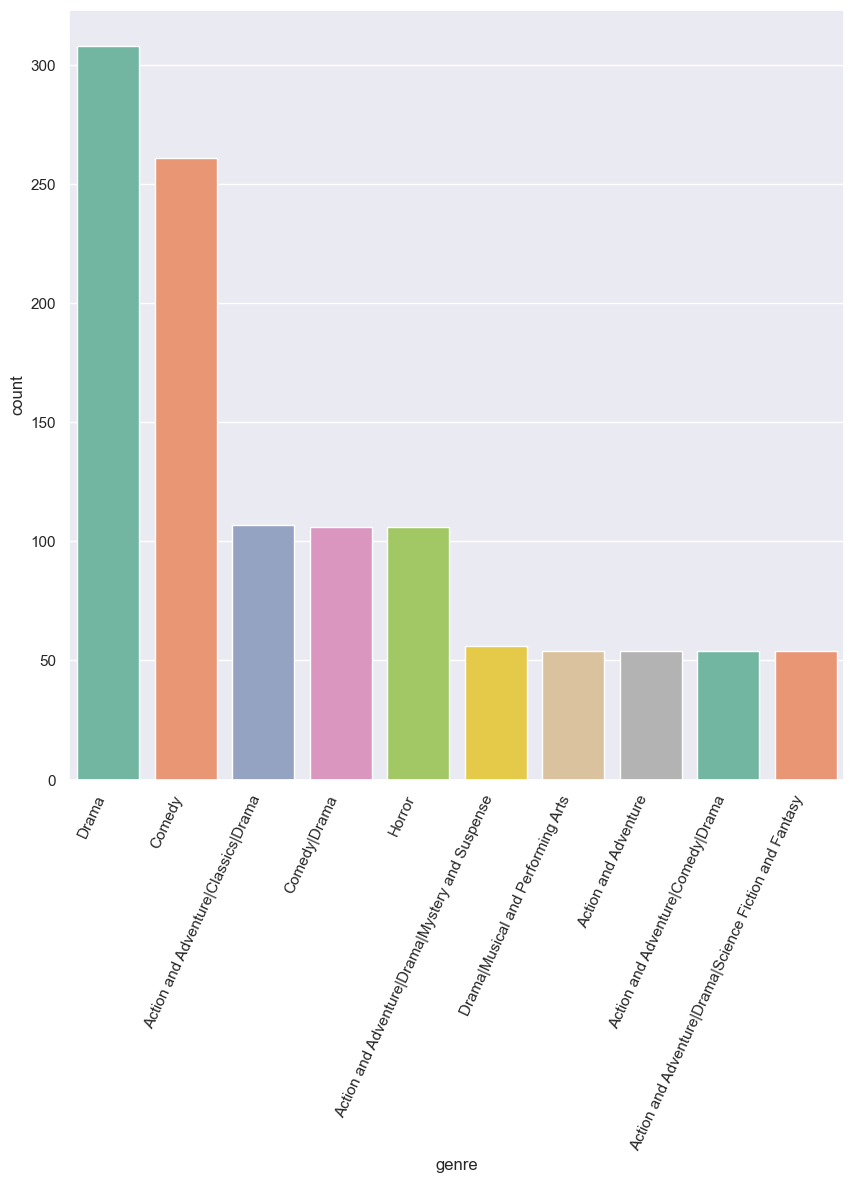

In [185]:
plt.figure(figsize=(10,10))
sns.set(style="darkgrid")
top_genres = rt_df["genre"].value_counts().nlargest(10).index
ax = sns.countplot(x="genre", data=rt_df[rt_df["genre"].isin(top_genres)], order=top_genres, palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=65, ha="right");

The above visualization shows that  "Drama" is a cash cow in the film industry as it ranks highest in worldwide gross sales

### Directors Vs Worldwide Gross 
Which directors sell highest?

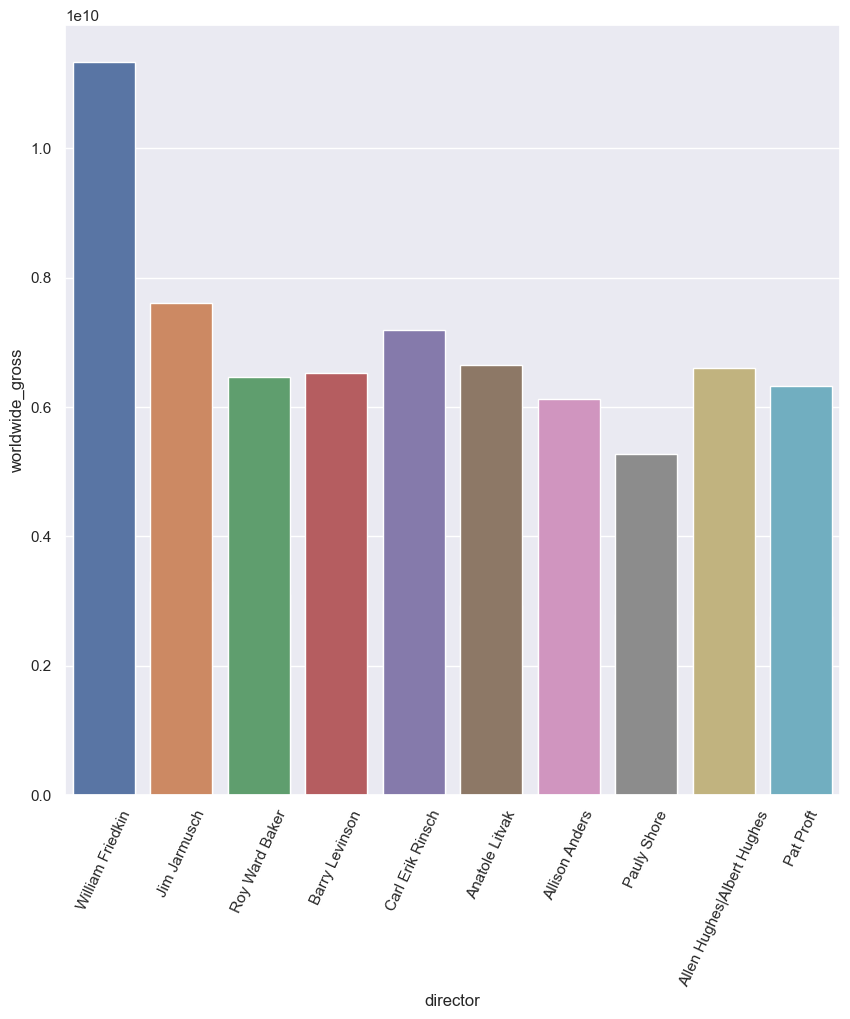

In [186]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=65)
top_directors = rt_df.groupby("director")[["domestic_gross", "worldwide_gross"]].sum().sort_values("domestic_gross", ascending=False)[:10]
sns.barplot(x=top_directors.index, y="domestic_gross", data=top_directors)
sns.barplot(x=top_directors.index, y="worldwide_gross", data=top_directors)
plt.show;

The above visualization is a list of top 10 directors according to worldwide gross sales, with William Friedkin at the top

###  Is there a relationship between release date (Month) and Worldwide Gross?

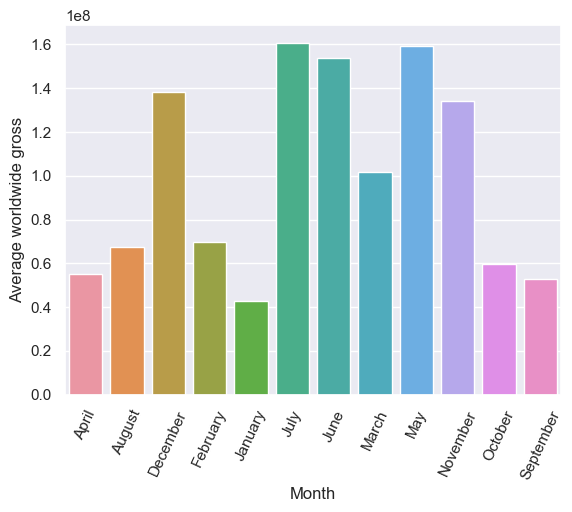

In [187]:
rt_df["month"] = rt_df["release_date"].dt.month_name()

# Group the data by month and calculate the average worldwide gross
avg_wwg_by_month = rt_df.groupby("month")["worldwide_gross"].mean()

# Plot a bar chart to visualize the trend
plt.xticks(rotation=65)
sns.barplot(x=avg_wwg_by_month.index, y=avg_wwg_by_month.values)
plt.xlabel("Month")
plt.ylabel("Average worldwide gross")
plt.show()


Yes! the visualization from the data shows that movies released on May June & July have the highest movie sales